In [1]:
import os
import sys
import numpy as np
import neuron
from neuron import h
from neuron.units import ms, mV
from neuron import gui
from matplotlib import pyplot as plt
import csv
from math import exp, log
import scipy

In [2]:
h.load_file("import3d.hoc")
morphology_file = "morphologies/cell1.asc"
h.load_file("L5PCbiophys3G.hoc")
h.load_file("L5PCtemplate_2.hoc")
L5PC = h.L5PCtemplate(morphology_file)
h.celsius = 37
v_rest = -78

845.34678 
845.34678 
845.34678 


37 spikes
2 Plateous


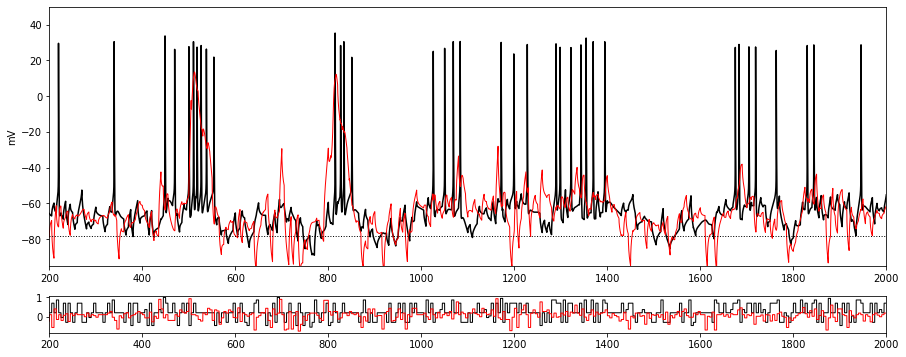

In [3]:
START_TIME = 25     # time to start the stimulus
END_TIME = 2000     # time to end the stimulus
TIME_PER_AMP = 5    # change amplitude every TIME_PER_AMP ms
MEAN_AMP = 0.2      # the mean amplitude
LAMBDA = 0.5        # the poisson mean
MEAN_AMP_2 = 0.1      # the mean amplitude
LAMBDA_2 = 3        # the poisson mean
times = np.arange(START_TIME, END_TIME, TIME_PER_AMP)
totime = END_TIME-START_TIME

random_amplitude = 1 / (np.random.poisson(LAMBDA, times.shape[0]) + 1) \
                   - 1 / (np.random.poisson(LAMBDA, times.shape[0]) + 1)
random_amplitude_2 = 1 / (np.random.poisson(LAMBDA_2, times.shape[0]) + 1) \
                   - 1 / (np.random.poisson(LAMBDA_2, times.shape[0]) + 1)
random_amplitude += MEAN_AMP
random_amplitude_2 += MEAN_AMP_2
clamps = []
clamps_records = []
clamps2 = []
clamps_records2 = []
for t in range(times.shape[0]):
    stim = h.IClamp(L5PC.soma[0](0.5))
    stim.delay = times[t]
    stim.amp = random_amplitude[t]
    stim.dur = TIME_PER_AMP
    clamps.append(stim)
    clamps_records.append(h.Vector().record(stim._ref_i))

    stim2 = h.IClamp(L5PC.apic[36](0.9))
    stim2.delay = times[t]
    stim2.amp = random_amplitude_2[t]
    stim2.dur = TIME_PER_AMP
    clamps2.append(stim2)
    clamps_records2.append(h.Vector().record(stim2._ref_i))

neuron_times = h.Vector().record(h._ref_t)
threshold = -20
som_v = h.Vector().record(L5PC.soma[0](0.5)._ref_v)
distal_v = h.Vector().record(L5PC.apic[36](0.9)._ref_v)
count = 0
h.finitialize(-80*mV)
h.continuerun(END_TIME + 50)
stimulus_as_one_array = np.sum([np.array(rec) for rec in clamps_records], axis=0)
stimulus_as_one_array_2 = np.sum([np.array(rec) for rec in clamps_records2], axis=0)
sumi = stimulus_as_one_array + stimulus_as_one_array_2


def plot_spikes():
    plt.rcParams['figure.figsize'] = [15,6]      
    f, (ax0, ax01) = \
        plt.subplots(2, gridspec_kw={'height_ratios': [7, 1]})
    ax0.plot(neuron_times, som_v,'k') 
    ax0.plot(neuron_times, distal_v,'r',linewidth=1)
    ax0.set(ylabel='mV', ylim=(-95,50), xlim=(200,2000))
    ax0.axhline(y=v_rest, color='k', linestyle=':', linewidth=1)
    ax01.plot(neuron_times, stimulus_as_one_array,'k',linewidth=1)
    ax01.plot(neuron_times, stimulus_as_one_array_2, 'r',linewidth=1)
    ax01.set(xlim=(200,2000))
    plt.show()

def count_spikes(v):  
    arr = np.array(v) > 0
    second_arr = arr[:-1]
    arr = arr[1:]
    #return np.sum(np.logical_and(arr, np.logical_not(second_arr)))
    count = np.sum(np.logical_and(arr, np.logical_not(second_arr)))
    print(count,"spikes")

def count_plateous(v):
    arr = np.array(v) > -10
    second_arr = arr[:-1]
    arr = arr[1:]
    #return np.sum(np.logical_and(arr, np.logical_not(second_arr)))
    count = np.sum(np.logical_and(arr, np.logical_not(second_arr)))
    print(count,"Plateaus")
    




count_spikes(som_v)
count_plateous(distal_v)
plot_spikes()